# Exercice 4 : Arbres de décision (suite)

Pour nos prochains exercices, on utilisera le dataset Iris fourni avec SciKit Learn 

## Exercice : Préparation dataset Iris 
### Import des données
- Importer les datasets de SciKit Learn : *from sklearn import datasets*
- Charger le dataset Iris dans une variable : *iris = datasets.load_iris()*
- Utiliser la fonction *dir* pour voir les attributs de l’objet iris
- Afficher le description de l’objet iris (attribut *iris.DESCR*)
- Afficher les noms des *features* (*iris.feature_names*) et des *targets* (*iris.target_names*) contenues dans le dataset. 


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print (iris.feature_names)
print (iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Construction des DataFrame

- Construire un nouveau DataFrame *df_iris* avec les données issues du dataset Iris :
*df_iris = pnd.DataFrame ( iris.data, columns=iris.feature_names )*
- Ajouter une colonne *target* au DataFrame avec les valeurs de targets du dataset (*iris.target*). 
- Afficher les premières lignes du nouveau DataFrame


In [5]:
import pandas as pnd

df_iris = pnd.DataFrame ( iris.data, columns=iris.feature_names )
df_iris['target'] = iris.target

df_iris.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Possibilité d'ajouter une colonne *target_names* avec les noms de targets. 

In [6]:
df_iris['target_name'] = df_iris['target'].apply( lambda y: iris.target_names[y] )
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Séparation données training et tests

- Séparer le DataFrame df_iris en deux ensembles
    - *iris_train* : DF pour le training 
    - *iris_test* : DF pour les tests
- Regarder avec *info* les informations de chaque ensemble
- Afficher les premières lignes de chaque ensemble 

In [7]:
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split (df_iris, test_size=0.3)

iris_train.info()
iris_train.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 6 to 129
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  105 non-null    float64
 1   sepal width (cm)   105 non-null    float64
 2   petal length (cm)  105 non-null    float64
 3   petal width (cm)   105 non-null    float64
 4   target             105 non-null    int64  
 5   target_name        105 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.7+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
6,4.6,3.4,1.4,0.3,0,setosa
65,6.7,3.1,4.4,1.4,1,versicolor
114,5.8,2.8,5.1,2.4,2,virginica
18,5.7,3.8,1.7,0.3,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor


In [8]:
iris_test.info()
iris_test.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 125 to 144
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  45 non-null     float64
 1   sepal width (cm)   45 non-null     float64
 2   petal length (cm)  45 non-null     float64
 3   petal width (cm)   45 non-null     float64
 4   target             45 non-null     int64  
 5   target_name        45 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
125,7.2,3.2,6.0,1.8,2,virginica
81,5.5,2.4,3.7,1.0,1,versicolor
133,6.3,2.8,5.1,1.5,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
24,4.8,3.4,1.9,0.2,0,setosa


## Exercice :  Choix des features et du target

On va utiliser toutes les features du dataset Iris pour l’analyse

- Préparer deux variables *x_train* et *y_train* avec les données d’entrainement (respectivement *features* et *target*)
- Faire la même chose avec les données de *test* (*x_test* et *y_test*)

In [9]:
x_train = iris_train[iris.feature_names]
y_train = iris_train['target']

print (y_train.head())
x_train.head()

6      0
65     1
114    2
18     0
58     1
Name: target, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
65,6.7,3.1,4.4,1.4
114,5.8,2.8,5.1,2.4
18,5.7,3.8,1.7,0.3
58,6.6,2.9,4.6,1.3


In [10]:
x_test = iris_test[iris.feature_names]
y_test = iris_test['target']

print (y_test.head())
x_test.head()

125    2
81     1
133    2
105    2
24     0
Name: target, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
125,7.2,3.2,6.0,1.8
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
105,7.6,3.0,6.6,2.1
24,4.8,3.4,1.9,0.2


## Exercice : Entrainement du modèle
- Créer un arbre de décision 
- Entrainer le modèle avec les variables de training qu’on vient de créer
- Afficher l’arbre entrainée 

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit (x_train, y_train)


from sklearn.tree import export_text

texte = export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=2)
print (texte)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



aussi possible avec plot_tree.

[Text(313.875, 587.0880000000001, 'petal length (cm) <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [36, 34, 35]\nclass = setosa'),
 Text(209.25, 456.624, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(418.5, 456.624, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 34, 35]\nclass = virginica'),
 Text(209.25, 326.1600000000001, 'petal length (cm) <= 5.35\ngini = 0.108\nsamples = 35\nvalue = [0, 33, 2]\nclass = versicolor'),
 Text(104.625, 195.69600000000003, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolor'),
 Text(313.875, 195.69600000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(627.75, 326.1600000000001, 'petal length (cm) <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]\nclass = virginica'),
 Text(523.125, 195.69600000000003, 'sepal length (cm) <= 5.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(418.5, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0

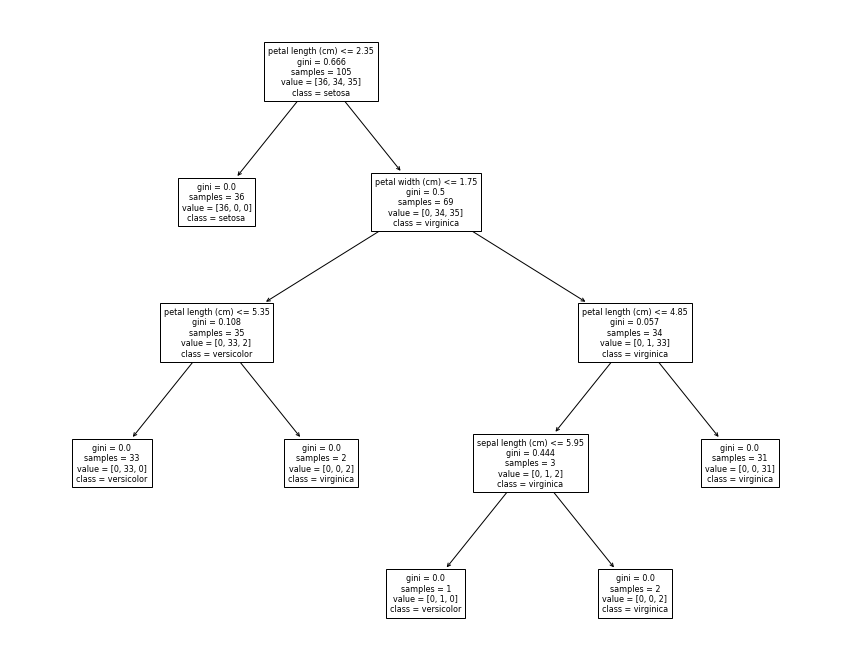

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

%matplotlib inline
plt.figure(figsize=(15,12))

plot_tree(clf, feature_names=iris.feature_names, 
               class_names=iris.target_names, fontsize=8)

## Exercice : Tester & évaluer le modèle
- Utiliser le modèle avec les données de test
- Afficher les valeurs obtenues  
- Utiliser la métrique *accuracy* afin d’évaluer les résultats
- Utiliser la métrique *precision* afin d’évaluer les résultats par label 
- Afficher la *matrice de confusion*  

In [13]:
y_pred = clf.predict (x_test)

print (y_pred)
print (y_test.values)

[2 1 1 2 0 1 1 2 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 2 1 2 1 2 2 2 1 1 1 0 1 0 2
 0 0 1 2 1 0 2 2]
[2 1 2 2 0 1 2 2 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 2 1 2 1 2 2 2 1 1 1 0 1 0 2
 0 0 2 2 1 0 2 2]


Aussi possible d'afficher les *target_names* obtenus grâce à une boucle *for*. 

In [14]:
for val in y_pred :
    label = iris.target_names[val]
    print (val, label )

2 virginica
1 versicolor
1 versicolor
2 virginica
0 setosa
1 versicolor
1 versicolor
2 virginica
0 setosa
0 setosa
1 versicolor
1 versicolor
1 versicolor
1 versicolor
0 setosa
0 setosa
0 setosa
1 versicolor
1 versicolor
0 setosa
0 setosa
0 setosa
1 versicolor
2 virginica
1 versicolor
2 virginica
1 versicolor
2 virginica
2 virginica
2 virginica
1 versicolor
1 versicolor
1 versicolor
0 setosa
1 versicolor
0 setosa
2 virginica
0 setosa
0 setosa
1 versicolor
2 virginica
1 versicolor
0 setosa
2 virginica
2 virginica


In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

acc = accuracy_score ( y_test, y_pred )
prec = precision_score ( y_test, y_pred, average=None )
mc = confusion_matrix( y_test ,y_pred)

print (acc)
print (prec)
print (mc)

0.9333333333333333
[1.         0.84210526 1.        ]
[[14  0  0]
 [ 0 16  0]
 [ 0  3 12]]


## Exercice : Illustration principe de validation croisée



In [17]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10 , test_size=0.3)

accuracy_scores = []

for train_index, test_index in rs.split(df_iris) :
    #print (train_index)

    x_train = df_iris.loc[train_index, iris.feature_names]
    x_test = df_iris.loc[test_index, iris.feature_names]

    y_train = df_iris.loc[train_index, 'target']
    y_test = df_iris.loc[test_index, 'target']

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)

    accuracy_scores.append( accuracy_score(y_test, y_pred) )

print(accuracy_scores)


[0.9777777777777777, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9777777777777777, 0.9111111111111111, 0.9777777777777777, 0.9555555555555556, 0.9333333333333333, 0.9111111111111111]


On peut aussi construire un graphique avec les résultats. 

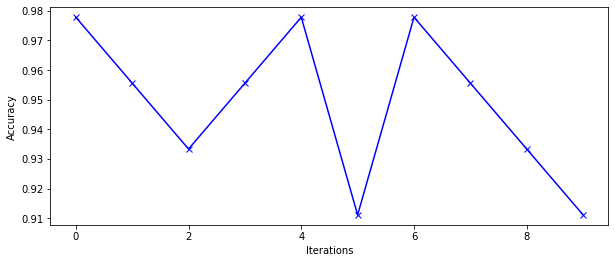

In [18]:
scores = pnd.Series(accuracy_scores)
plt.figure(figsize=(10, 4))
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(scores.index, scores.values, color='blue', marker='x')

## Exercice : Réaliser une validation croisée

- Toujours avec le dataset Iris, réaliser une validation croisée
- Construire un DataFrame avec les résultats
- Afficher les résultats obtenus 


In [19]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
rs = ShuffleSplit (n_splits=10, test_size=0.3)

x_set = df_iris[iris.feature_names]
y_set = df_iris['target']

cv_results = cross_validate ( clf , x_set, y_set, cv=rs, scoring='accuracy' )

scores = pnd.DataFrame (cv_results)
scores

,fit_time,score_time,test_score
0,0.003009,0.001951,0.933333
1,0.003925,0.002165,1.000000
2,0.002157,0.001678,0.955556
3,0.002142,0.001444,0.977778
4,0.002885,0.001450,0.911111
5,0.001908,0.001574,0.933333
6,0.002161,0.001256,0.955556
7,0.002070,0.001251,0.933333
8,0.001793,0.001368,0.977778
9,0.001898,0.001249,0.955556


On peut aussi construire un graphique pour mieux visualiser les résultats. 

<AxesSubplot:>

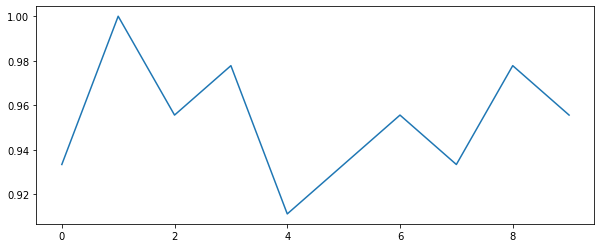

In [20]:
scores['test_score'].plot(figsize=(10,4))